In [1]:
# PCA mainly used in NeuralNetwork
# 2ndly we can use in Clusstering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # PCA is imported from decomposition module
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\SS\Downloads\MDS Course files\Data set\big_mart_trai n.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [8]:
df.shape

(4650, 12)

In [9]:
df.nunique()

Item_Identifier              1535
Item_Weight                   409
Item_Fat_Content                5
Item_Visibility              4280
Item_Type                      16
Item_MRP                     3806
Outlet_Identifier               5
Outlet_Establishment_Year       5
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     2
Item_Outlet_Sales            2449
dtype: int64

In [10]:
from sklearn import preprocessing
df1=df.apply(preprocessing.LabelEncoder().fit_transform)

In [11]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,154,279,1,395,4,3582,4,2,1,0,0,1886
1,8,56,2,512,14,295,1,4,1,2,1,152
2,656,369,1,421,10,1874,4,2,1,0,0,1161
4,1277,261,1,0,9,391,0,0,0,2,0,506
5,750,291,2,0,0,354,1,4,1,2,1,224


In [12]:
x=df1.values

In [13]:
from sklearn.preprocessing import scale
x=scale(x)
x[0:3]

array([[-1.38407193e+00, -8.97916169e-02, -5.67440984e-01,
        -1.24463046e+00, -7.65288392e-01,  1.55780834e+00,
         1.41406168e+00,  1.21652870e-03, -2.66543266e-01,
        -1.11803399e+00, -4.99327866e-01,  1.16357135e+00],
       [-1.71429453e+00, -2.27044217e+00,  9.69309496e-01,
        -1.15480511e+00,  1.60916348e+00, -1.47754903e+00,
        -7.06574791e-01,  1.41543114e+00, -2.66543266e-01,
         1.11803399e+00,  2.00269215e+00, -1.49207347e+00],
       [-2.48649009e-01,  7.90291565e-01, -5.67440984e-01,
        -1.22466927e+00,  6.59382732e-01, -1.94324196e-02,
         1.41406168e+00,  1.21652870e-03, -2.66543266e-01,
        -1.11803399e+00, -4.99327866e-01,  5.32238900e-02]])

In [14]:
pca=PCA(n_components=2)

In [15]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
var=pca.explained_variance_ratio_
var

array([0.22363267, 0.14778622])

In [17]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var1)

[22.36 37.14]


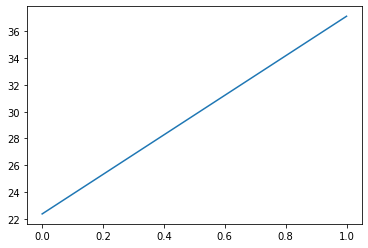

In [18]:
plt.plot(var1)